# FACTORS THAT INFLUENCE LOAN ELIGIBILITY

## Introduction

This project analyzes a dataset containing information about loan applicants, including their personal details, loan amounts, and loan term. The dataset features key variables such as gender, marital status, number of dependents, education level, employment status, income, loan amount, loan term, and residential area. By examining these variables, I aim to understand patterns and trends related to loan approvals and amounts, as well as identify the demographic and socio-economic factors that influence loan eligibility.

Understanding these insights can help financial institutions improve their decision-making processes, create fairer lending policies, and develop data-driven risk assessment models.



## Objectives

1. Explore the distribution of loan applicants across various demographic and socio-economic groups (e.g., gender, marital status, dependents, resident area).

2. Analyze the average loan amounts based on categories such as gender, marital status, loan term, and number of dependents.

3. Visualize key patterns using histogram,boxplot, pie charts, bar charts, and column charts to make insights more accessible and interpretable.

4. Identify potential relationships between applicant characteristics and loan features that may influence loan approval decisions.

5. Lay the groundwork for future predictive modeling tasks such as loan eligibility classification or risk analysis.

In [224]:
#importing libraries
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler  # Include StandardScaler here
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier



In [226]:
# Load data
Loan = pd.read_csv('loan_test.csv')

In [228]:
Loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [230]:
Loan.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural
366,LP002989,Male,No,0,Graduate,Yes,9200,0,98.0,180.0,1.0,Rural


In [232]:
Loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [234]:
Loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [236]:
Loan.shape

(367, 12)

# DATA CLEANING

In [239]:
#dropping the Credit History column
Loan = Loan.drop('Credit_History', axis=1)

In [241]:
# Remove rows with any NaN values
Loan_cleaned = Loan.dropna()

In [243]:
#renaming  columns
Loan.rename(columns={'Loan_Amount_Term':'Loan_Term'},inplace=True)
Loan.rename(columns={'Property_Area':'Resident_Area'},inplace=True)
Loan.rename(columns={'ApplicantIncome':'Applicant_Income'},inplace=True)
Loan.rename(columns={'CoapplicantIncome':'Coapplicant_Income'},inplace=True)
Loan.rename(columns={'LoanAmount':'Loan_Amount'},inplace=True)

In [245]:
#Data type of each columns
Loan.dtypes

Loan_ID                object
Gender                 object
Married                object
Dependents             object
Education              object
Self_Employed          object
Applicant_Income        int64
Coapplicant_Income      int64
Loan_Amount           float64
Loan_Term             float64
Resident_Area          object
dtype: object

In [247]:
# Changing Datatypes
Loan["Gender"]= Loan["Gender"].astype("category")
Loan["Married"]= Loan["Married"].astype("category")
Loan["Education"]= Loan["Education"].astype("category")
Loan["Self_Employed"]= Loan["Self_Employed"].astype("category")


In [249]:
Loan.dtypes

Loan_ID                 object
Gender                category
Married               category
Dependents              object
Education             category
Self_Employed         category
Applicant_Income         int64
Coapplicant_Income       int64
Loan_Amount            float64
Loan_Term              float64
Resident_Area           object
dtype: object

In [251]:
### Count of Gender
Loan["Gender"].value_counts()

Gender
Male      286
Female     70
Name: count, dtype: int64

In [253]:
Loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Term,Resident_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,Urban


In [255]:
#Checking for number of  duplicate entries
Loan.duplicated().sum()

0

In [257]:
# Saving to a csv
Loan.to_csv("loan_test_cleaned.csv", index=False)

# EXPLORATORY DATA ANALYSIS

In [260]:
Loan.describe()

,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Term
count,367.000000,367.000000,362.000000,361.000000
mean,4805.599455,1569.577657,136.132597,342.537396
std,4910.685399,2334.232099,61.366652,65.156643
min,0.000000,0.000000,28.000000,6.000000
25%,2864.000000,0.000000,100.250000,360.000000
50%,3786.000000,1025.000000,125.000000,360.000000
75%,5060.000000,2430.500000,158.000000,360.000000
max,72529.000000,24000.000000,550.000000,480.000000


# VISUALISATION

In [263]:
print(Loan.columns)


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Applicant_Income', 'Coapplicant_Income',
       'Loan_Amount', 'Loan_Term', 'Resident_Area'],
      dtype='object')


In [326]:
#Importing my colors

color = ['#A76545','#FFA55D','#FFDF88']

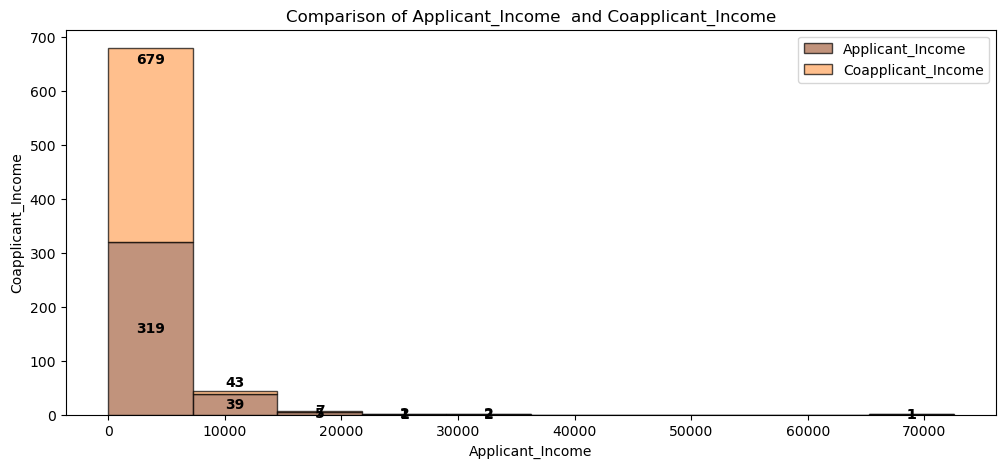

In [328]:
# Creating stacked histogram

plt.figure(figsize=(12, 5))
counts, bins, patches = plt.hist(
    [Loan["Applicant_Income"], Loan["Coapplicant_Income"]],
    bins=10,
    stacked=True,
    label=["Applicant_Income", "Coapplicant_Income"],
    color=[color[0], color[1]],  # Updated colors from palette
    edgecolor="black",
    alpha=0.7
)

# Add data labels with black text
for i in range(len(bins) - 1):
    y_value = 0  # Track the height of stacked bars
    for dataset_idx in range(len(counts)):  # Loop over Applicant_Income & Coapplicant_Income
        if counts[dataset_idx][i] > 0:  # Only label non-zero bars
            plt.text(
                (bins[i] + bins[i+1]) / 2,  # X position (bar center)
                y_value + counts[dataset_idx][i] / 2,  # Y position (middle of the bar segment)
                str(int(counts[dataset_idx][i])),  # Label as integer count
                ha='center', va='center', fontsize=10, color='black', fontweight='bold'
            )
            y_value += counts[dataset_idx][i]  # Update height for stacking

plt.xlabel("Applicant_Income")
plt.ylabel("Coapplicant_Income")
plt.title("Comparison of Applicant_Income  and Coapplicant_Income")
plt.legend()
plt.show()

## Findings

1. The stacked histogram shows that applicant incomes are generally higher and more widely distributed than coapplicant incomes, which tend to cluster at lower values.
2. A large number of applicants fall into the lower-to-mid income brackets, suggesting that most loan applicants come from moderate-income households.
3. The presence of zero or very low values in Coapplicant_Income in many bins indicates that a substantial number of applications either don’t include a co-applicant or the co-applicant contributes little income.
4. In some bins, both Applicant_Income and Coapplicant_Income contribute, highlighting that dual-income households are present and can be relevant in mid-tier income brackets.

## Recommendations

1. Design different loan products for single-income vs. dual-income households, recognizing that coapplicants may significantly influence repayment capacity in some brackets.
2. Applicants with lower or zero coapplicant income may carry higher repayment risk depending on loan size—warranting closer scrutiny or stricter terms.
3. Offer financial literacy or co-borrowing workshops for applicants with low individual incomes to encourage responsible co-borrowing.

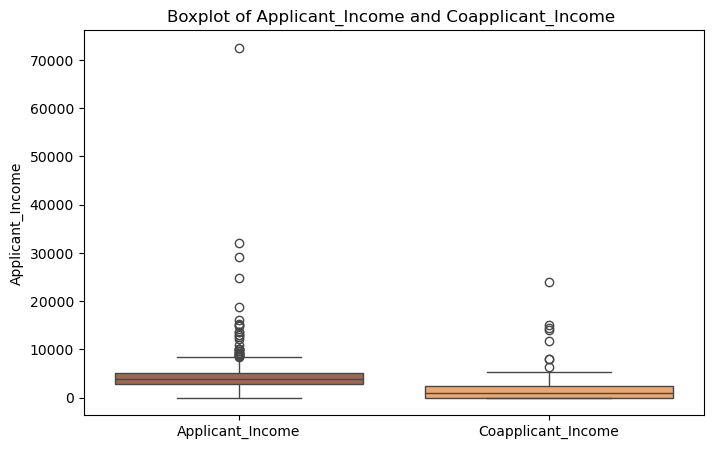

In [330]:
# Plotting boxplot with custom colors

plt.figure(figsize=(8, 5))
sns.boxplot(data=Loan[["Applicant_Income", "Coapplicant_Income"]], palette=[color[0], color[1]])  # Applying custom colors

plt.ylabel("Applicant_Income")
plt.title("Boxplot of Applicant_Income and Coapplicant_Income ")
plt.show()


## Findings

1. The median income for applicants is higher than that of coapplicants, as shown by the position of the central line in each box.
2. The Coapplicant_Income distribution is more compressed, suggesting that coapplicants tend to fall into a narrower income range.
3. There are several outliers in both groups, especially among Applicant_Income, where some values are significantly higher than the rest of the distribution.

## Recommendations

1. Given the presence of outliers and skewed distribution, consider applying log transformation or normalization to income variables when using them in predictive models.
2. Financial institutions should recognize that not all applicants fall within typical income brackets. High-income outliers may require customized loan terms or premium financial products.
3. Given the concentration of lower coapplicant incomes, develop loan packages or financial support initiatives aimed at single-income or low-income households.

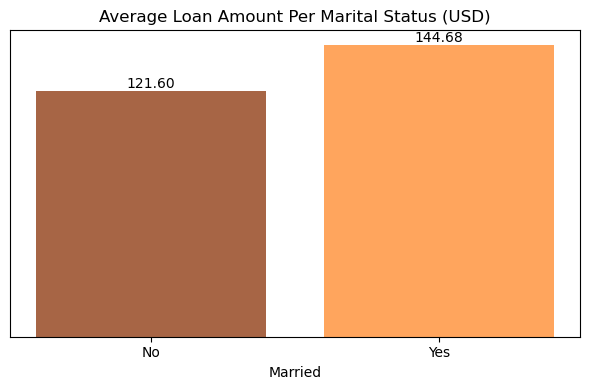

In [332]:

# Grouping by Marital Status and calculating the average Loan Amount

loan_by_marital_status = Loan.groupby("Married")["Loan_Amount"].mean()

# Plotting
plt.figure(figsize=(6, 4))
plt.bar(loan_by_marital_status.index, loan_by_marital_status.values, color=[color[0], color[1]])   # Add colors here
plt.title("Average Loan Amount Per Marital Status (USD)")
plt.xlabel("Married")

# Hide Y-axis
plt.gca().axes.get_yaxis().set_visible(False)

# Add data labels
for i, value in enumerate(loan_by_marital_status.values):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()




## Findings

1. The chart shows a clear difference in average loan amounts between married and unmarried applicants.
2. The married individuals have a higher average loan amount, indicating that marital status might influence loan size or eligibility.
3. The difference may be influenced by other variables associated with marital status, such as dual incomes, household size, or perceived financial stability.

## Recommendations

1. Financial institutions could consider offering tailored loan products for married and unmarried applicants, taking into account typical financial profiles and borrowing capacity.
2. Ensure that unmarried applicants are not unintentionally disadvantaged in access to credit, especially if the observed loan amount gap is due to policy rather than financial behavior.
3. Analyze loan amount differences within marital status categories by income level, credit history, or number of dependents to better understand the drivers behind the trend.

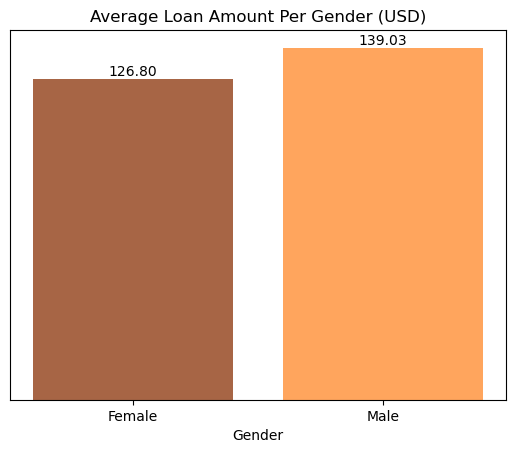

In [335]:
# Grouping by Gender and calculating the average Loan Amount

loan_by_gender = Loan.groupby("Gender")["Loan_Amount"].mean()

# Plotting
plt.bar(loan_by_gender.index, loan_by_gender.values,color=[color[0], color[1]])
plt.title("Average Loan Amount Per Gender (USD)")
plt.xlabel("Gender")

# Hide Y-axis
plt.gca().axes.get_yaxis().set_visible(False)

# Add data labels
for i, value in enumerate(loan_by_gender.values):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')

plt.show()


## Findings

1. The chart reveals a difference in average loan amounts between male and female applicants.
2. The males, tend to receive a higher average loan amount, which may reflect differences in income levels, employment types, or financial profiles.
3. The observed difference may be due to factors like coapplicant presence, or institutional lending patterns, and may warrant deeper investigation to rule out gender-based bias.

## Recommendations

1. Financial institutions should ensure their credit evaluation process is free from gender bias, particularly if the disparity in loan amounts isn't justified by risk factors or financial capability.
2. If women are found to receive lower average loans, consider targeted financial literacy programs or credit support initiatives aimed at empowering female borrowers.
3. Review internal loan approval criteria to ensure fair access to credit for all genders, especially if the differences arise from discretionary factors.


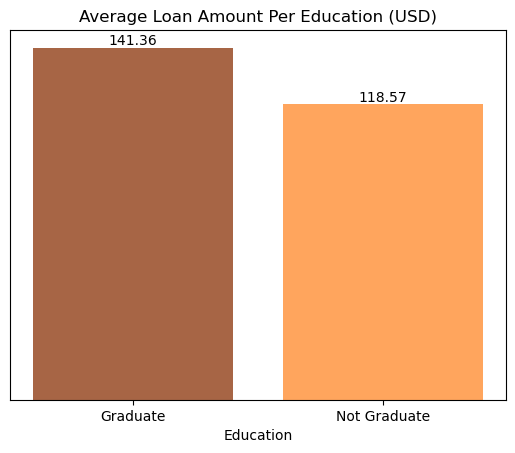

In [338]:
# Grouping by Education and calculating the average Loan Amount

loan_by_education = Loan.groupby("Education")["Loan_Amount"].mean()

# Plotting
plt.bar(loan_by_education.index, loan_by_education.values,color=[color[0], color[1]])
plt.title("Average Loan Amount Per Education (USD)")
plt.xlabel("Education")

# Hide Y-axis
plt.gca().axes.get_yaxis().set_visible(False)

# Add data labels
for i, value in enumerate(loan_by_education.values):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')

plt.show()


## Findings

1. The chart shows a difference in average loan amounts between applicants with different education levels (typically “Graduate” vs. “Not Graduate”).
2. In this dataset, graduates tend to receive higher loan amounts, which could be due to better employment opportunities or higher earning potential.
3. The data suggests that educational background may influence loan eligibility or the size of approved loans, possibly due to risk assessment policies by lenders.

## Recommendations
    
1. Since education level appears correlated with loan amount, it may be a useful predictor in credit scoring models, though it should be carefully balanced with other factors.
2. Financial institutions could consider creating products tailored to non-graduate borrowers, such as smaller loans with more flexible terms, to promote financial inclusion.
3. Offer educational tools or financial planning resources targeting non-graduates to increase their financial literacy and loan readiness.

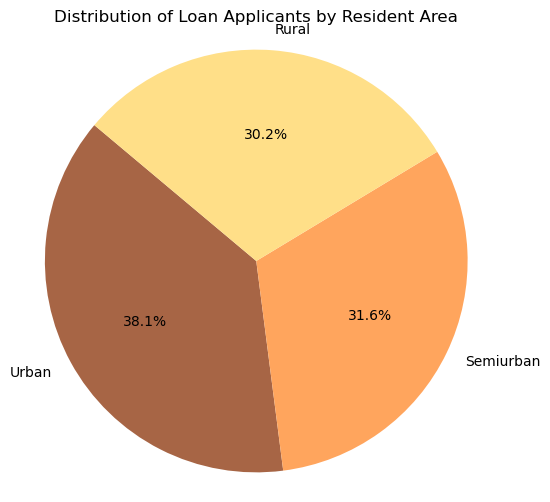

In [315]:
# Distribution of Loan Applicants by Resident Area

area_counts = Loan["Resident_Area"].value_counts()

# Define your custom colors
colors = ['#A76545', '#FFA55D', '#FFDF88']

# Plotting the pie chart with custom colors
plt.figure(figsize=(6, 6))
plt.pie(area_counts, labels=area_counts.index, autopct='%1.1f%%',
        startangle=140, colors=colors)
plt.title("Distribution of Loan Applicants by Resident Area")
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.show()


## Findings

1. The pie chart reveals that urban residential area has the highest proportion of loan applicants.
2. The use of percentage labels provides a quick understanding of the relative share of each residential area.

## Recommendations

1. Since rural areas have a lower share of applicants, financial institutions should consider increasing outreach efforts in these communities through mobile banking units, partnerships, or financial literacy programs.
2. Design region-specific loan products, as financial needs may vary between urban, semiurban, and rural areas (e.g., agriculture vs. housing or business loans).
3. Use this data to track the success of marketing and access strategies in each residential category over time.

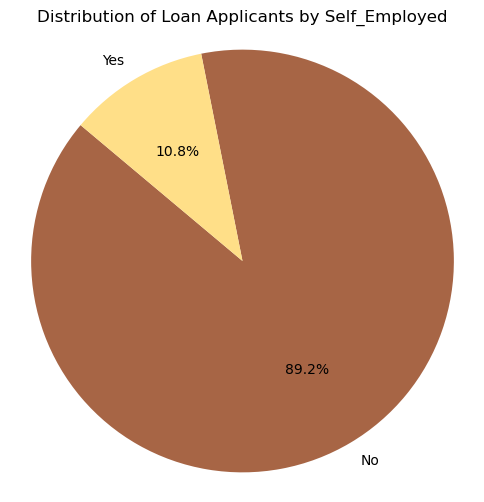

In [342]:
# Distribution of Loan Applicants by Self_Employed

area_counts = Loan["Self_Employed"].value_counts()

# Define custom colors
colors = ['#A76545', '#FFDF88']

# Plotting pie chart
plt.figure(figsize=(6, 6))
plt.pie(area_counts, labels=area_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title("Distribution of Loan Applicants by Self_Employed")
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.show()


## Findings

1. The chart typically shows a larger proportion of applicants as not self-employed, indicating that most applicants have salaried or wage-based income sources.
2. The self-employed group often represents a minority of the applicant pool. This could be due to fewer loan applications from self-employed individuals or higher barriers to entry.
3. The pie chart presents a concise visual breakdown, allowing stakeholders to quickly assess how employment type is represented in loan applications.

## Recommendations

1. Since self-employed individuals often face documentation or credit assessment challenges, consider creating alternative evaluation criteria (e.g., bank statements, turnover reports).
2. Develop custom loan products tailored to self-employed individuals, especially in sectors like retail, freelancing, or small-scale services.
3. Offer advisory programs or loan-readiness training for self-employed individuals to help them meet documentation and eligibility requirements.

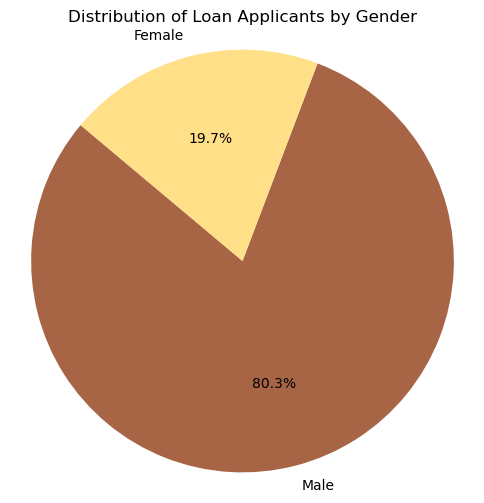

In [348]:
# Distribution of Loan Applicants by Gender

area_counts = Loan["Gender"].value_counts()

# Define custom colors
colors = ['#A76545', '#FFDF88']

# Plotting pie chart
plt.figure(figsize=(6, 6))
plt.pie(area_counts, labels=area_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title("Distribution of Loan Applicants by Gender")
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.show()


## Findings

1. The pie chart typically shows that a significant majority of loan applicants are male.
2. This gender imbalance could indicate either higher loan-seeking behavior among men or lower access or awareness among women.
3. This skewed distribution may reflect socioeconomic factors, such as employment patterns, financial literacy, or societal norms around financial decision-making.

## Recommendations

1. Design financial products and services that are inclusive and tailored to the needs of female applicants, such as business loans for women entrepreneurs.
2. Implement outreach programs aimed at increasing financial awareness and literacy among women, especially in underserved or rural communities.
3. Introduce interest rate concessions or guaranteed minimum credit lines for qualified women applicants to encourage participation.


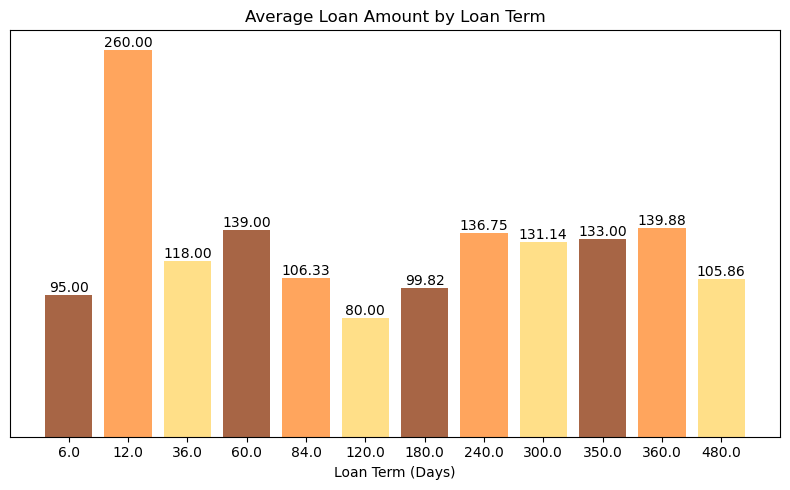

In [351]:
# Grouping by Loan_Term and calculating the average Loan_Amount

loan_by_term = Loan.groupby("Loan_Term")["Loan_Amount"].mean()

# Plotting column chart
plt.figure(figsize=(8, 5))
plt.bar(loan_by_term.index.astype(str), loan_by_term.values,color=[color[0], color[1], color[2]])
plt.title("Average Loan Amount by Loan Term")
plt.xlabel("Loan Term (Days)")
plt.ylabel("Average Loan Amount")

# Hide Y-axis
plt.gca().axes.get_yaxis().set_visible(False)

# Add data labels
for i, value in enumerate(loan_by_term.values):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


## Findings

1. The chart shows that longer loan terms are generally associated with higher average loan amounts.
2. Some terms (e.g., 360 days or 180 days) might stand out as more common or preferred, potentially linked to standardized lending policies or customer preferences.
3. The use of direct labeling on each bar allows for easy comparison across different loan terms without relying on the Y-axis.

## Recommendations

1. Consider offering loan products with term flexibility, allowing applicants to choose repayment plans suited to their borrowing capacity and financial goals.
2. Explore the implementation of term-based interest rate models, where longer loan terms may carry slightly higher interest to offset repayment risks.
3. Educate customers about the impact of loan terms on their total repayment amount, not just monthly installments.

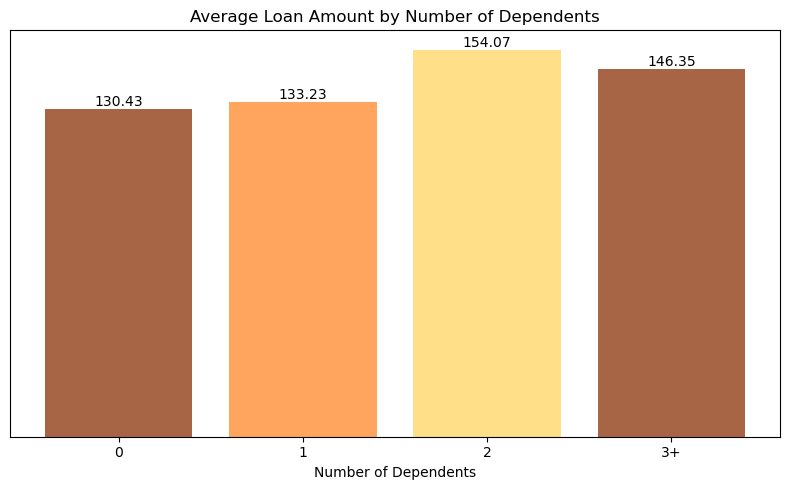

In [353]:
# Grouping by Dependents and calculating the average Loan_Amount

loan_by_dependents = Loan.groupby("Dependents")["Loan_Amount"].mean()

# Plotting column chart
plt.figure(figsize=(8, 5))
plt.bar(loan_by_dependents.index.astype(str), loan_by_dependents.values, color=[color[0], color[1], color[2]])
plt.title("Average Loan Amount by Number of Dependents")
plt.xlabel("Number of Dependents")
plt.ylabel("Average Loan Amount")

# Hide Y-axis
plt.gca().axes.get_yaxis().set_visible(False)

# Add data labels
for i, value in enumerate(loan_by_dependents.values):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


## Findings

1. The chart reveals fluctuations in average loan amounts based on the number of dependents.
2. The relationship between the number of dependents and loan amount is not strictly linear—e.g., applicants with 1 or 2 dependents might receive higher average amounts than those with 3+.
3. The number of dependents may influence lenders' perception of repayment capacity, affecting the approved loan amount.

## Recommendations

1. Consider customizing loan eligibility models to better assess applicants with multiple dependents, factoring in household income and coapplicant contributions.
2. Reassess whether current lending policies fairly account for dependents, especially if they inadvertently penalize applicants with higher family responsibilities.
3. Introduce family-oriented financial planning tools that help borrowers optimize loan use and repayment when managing larger households.


## Conclusion

The loan applicant dataset reveals clear patterns in how demographic and financial factors influence loan amounts and potential approval decisions. Male, married, and graduate applicants generally receive higher average loan amounts, while those in semiurban areas represent a large share of the applicant pool.

Income analysis shows that applicant income outweighs coapplicant income, suggesting that the main applicant's earning capacity is a strong driver of loan eligibility. Similarly, longer loan terms are associated with higher requested amounts, and dependents slightly affect loan size, though not consistently.


# Machine Learning


## Goal of the Model

The primary objective of this predictive model is to estimate the **Loan Amount** that an applicant is eligible for, based on various characteristics provided in the loan dataset. By leveraging key categorical features, the model aims to support financial institutions in making informed, data-driven decisions regarding loan approvals and disbursements.

To achieve this, the model utilizes a set of input variables that reflect the applicant’s personal and financial background. These include:

- **Gender** – to identify whether the applicant is male or female.  
- **Married** – to determine the applicant’s marital status.  
- **Education** – indicating whether the applicant is a graduate or not.  
- **Self_Employed** – specifying if the applicant is self-employed.  
- **Property_Area** – capturing the area type where the applicant resides (e.g., Urban, Semiurban, Rural).  
- **Loan_Amount_Term** – referring to the term of the loan in months.  
 

By analyzing patterns and correlations within these categorical features, the model can generate predictions on the potential loan amount for future applicants. This approach not only streamlines the loan approval process but also enhances fairness and consistency in lending decisions.



In [311]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# STEP 1: Drop NA values (you can also impute if needed)
Loan_cleaned = Loan.dropna()

# STEP 2: Create classification target — 1 if above median loan, else 0
Loan_cleaned['Loan_Amount_Class'] = (Loan_cleaned['Loan_Amount'] > Loan_cleaned['Loan_Amount'].median()).astype(int)

# STEP 3: Drop original continuous target
Loan_cleaned = Loan_cleaned.drop(columns=['Loan_Amount'])

# STEP 4: Convert categorical variables to numerical (this is key!)
Loan_encoded = pd.get_dummies(Loan_cleaned, drop_first=True)

# STEP 5: Split into features and target
X = Loan_encoded.drop(columns=['Loan_Amount_Class'])
y = Loan_encoded['Loan_Amount_Class']

# STEP 6: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 7: Standardize the numeric features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# STEP 8: Train models and evaluate

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
print("Logistic Regression:\n", classification_report(y_test, lr.predict(X_test)))

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print("Random Forest:\n", classification_report(y_test, rf.predict(X_test)))

# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print("KNN:\n", classification_report(y_test, knn.predict(X_test)))


Logistic Regression:
               precision    recall  f1-score   support

           0       0.55      0.64      0.59        33
           1       0.52      0.43      0.47        30

    accuracy                           0.54        63
   macro avg       0.54      0.53      0.53        63
weighted avg       0.54      0.54      0.53        63

Random Forest:
               precision    recall  f1-score   support

           0       0.71      0.76      0.74        33
           1       0.71      0.67      0.69        30

    accuracy                           0.71        63
   macro avg       0.71      0.71      0.71        63
weighted avg       0.71      0.71      0.71        63

KNN:
               precision    recall  f1-score   support

           0       0.59      0.79      0.68        33
           1       0.63      0.40      0.49        30

    accuracy                           0.60        63
   macro avg       0.61      0.59      0.58        63
weighted avg       0.61      0

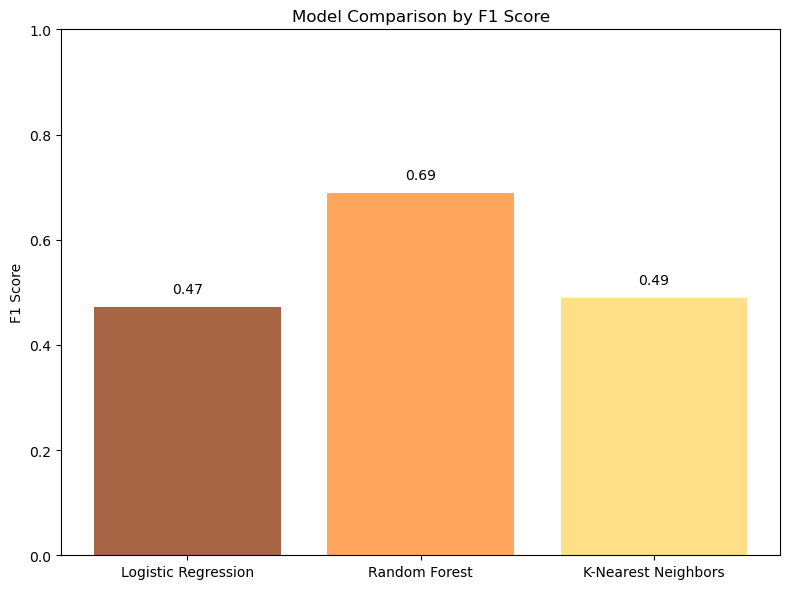

In [321]:


# Get F1 scores for each model
lr_f1 = f1_score(y_test, lr.predict(X_test))
rf_f1 = f1_score(y_test, rf.predict(X_test))
knn_f1 = f1_score(y_test, knn.predict(X_test))

# Model names and scores
models = ['Logistic Regression', 'Random Forest', 'K-Nearest Neighbors']
f1_scores = [lr_f1, rf_f1, knn_f1]

# Define custom colors
colors = ['#A76545', '#FFA55D', '#FFDF88']

# Create bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(models, f1_scores, color=colors)
plt.title('Model Comparison by F1 Score')
plt.ylabel('F1 Score')
plt.ylim(0, 1)

# Add labels to bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, yval + 0.02, f'{yval:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()
